In [92]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [95]:
import pandas as pd
import numpy as np
import processing_data as pr
import feature_engineer as fe 
import data_generator as dg
import detect_and_handle_outlier as outlier
import matplotlib.pyplot as plt

In [96]:
csv_path = r"C:\Users\ADMIN\Documents\Quantitative\Data\stocks_data\AAPL.csv"
SP_500_path = r"C:\Users\ADMIN\Documents\Quantitative\Data\S&P_500"
df_SP500 = pd.read_csv(SP_500_path)
df = pr.load_data(csv_path)
df

,date,ticker,adj_close,close,high,low,open,volume
0,2015-01-02,AAPL,24.237545,27.332500,27.860001,26.837500,27.847500,212818400.0
1,2015-01-05,AAPL,23.554737,26.562500,27.162500,26.352501,27.072500,257142000.0
2,2015-01-06,AAPL,23.556955,26.565001,26.857500,26.157499,26.635000,263188400.0
3,2015-01-07,AAPL,23.887274,26.937500,27.049999,26.674999,26.799999,160423600.0
4,2015-01-08,AAPL,24.805080,27.972500,28.037500,27.174999,27.307501,237458000.0
...,...,...,...,...,...,...,...,...
2697,2025-09-24,AAPL,252.065643,252.309998,255.740005,251.039993,255.220001,42303700.0
2698,2025-09-25,AAPL,256.621216,256.869995,257.170013,251.710007,253.210007,55202100.0
2699,2025-09-26,AAPL,255.212601,255.460007,257.600006,253.779999,254.100006,46076300.0
2700,2025-09-29,AAPL,254.183594,254.429993,255.000000,253.009995,254.559998,40127700.0


In [97]:
# add close log return
df = fe.add_lagged_log_returns(df, "close", no_max_lags=0).dropna().reset_index(drop=True)
df

,date,ticker,adj_close,close,high,low,open,volume,close_log_return
0,2015-01-05,AAPL,23.554737,26.562500,27.162500,26.352501,27.072500,257142000.0,-0.028576
1,2015-01-06,AAPL,23.556955,26.565001,26.857500,26.157499,26.635000,263188400.0,0.000094
2,2015-01-07,AAPL,23.887274,26.937500,27.049999,26.674999,26.799999,160423600.0,0.013925
3,2015-01-08,AAPL,24.805080,27.972500,28.037500,27.174999,27.307501,237458000.0,0.037703
4,2015-01-09,AAPL,24.831684,28.002501,28.312500,27.552500,28.167500,214798000.0,0.001072
...,...,...,...,...,...,...,...,...,...
2696,2025-09-24,AAPL,252.065643,252.309998,255.740005,251.039993,255.220001,42303700.0,-0.008367
2697,2025-09-25,AAPL,256.621216,256.869995,257.170013,251.710007,253.210007,55202100.0,0.017912
2698,2025-09-26,AAPL,255.212601,255.460007,257.600006,253.779999,254.100006,46076300.0,-0.005504
2699,2025-09-29,AAPL,254.183594,254.429993,255.000000,253.009995,254.559998,40127700.0,-0.004040


In [98]:
df_SP500['date'] = pd.to_datetime(df_SP500['date'])

In [99]:
df_SP500 = fe.add_lagged_log_returns(df_SP500, "close", no_max_lags=0)
df_SP500

,date,ticker,close,high,low,open,volume,close_log_return
0,2015-01-02,^GSPC,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,NaN
1,2015-01-05,^GSPC,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,-0.018447
2,2015-01-06,^GSPC,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,-0.008933
3,2015-01-07,^GSPC,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,0.011563
4,2015-01-08,^GSPC,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,0.017730
...,...,...,...,...,...,...,...,...
2697,2025-09-24,^GSPC,6637.970215,6672.660156,6621.759766,6669.790039,5459180000,-0.002851
2698,2025-09-25,^GSPC,6604.720215,6619.000000,6569.220215,6608.189941,5874670000,-0.005022
2699,2025-09-26,^GSPC,6643.700195,6648.970215,6604.430176,6615.379883,5103110000,0.005884
2700,2025-09-29,^GSPC,6661.209961,6677.310059,6644.490234,6661.580078,5358760000,0.002632


#### Preprocesing Data

- Sort & deduplicate
- Check OHLCV sanity
- Check missing value

In [100]:
df = pr.sort_and_deduplicate(df)
df_bad = pr.check_ohlcv_sanity(df)
df_bad

,date,ticker,adj_close,close,high,low,open,volume,close_log_return


In [101]:
pr.check_missing_values(df)

No Missing value


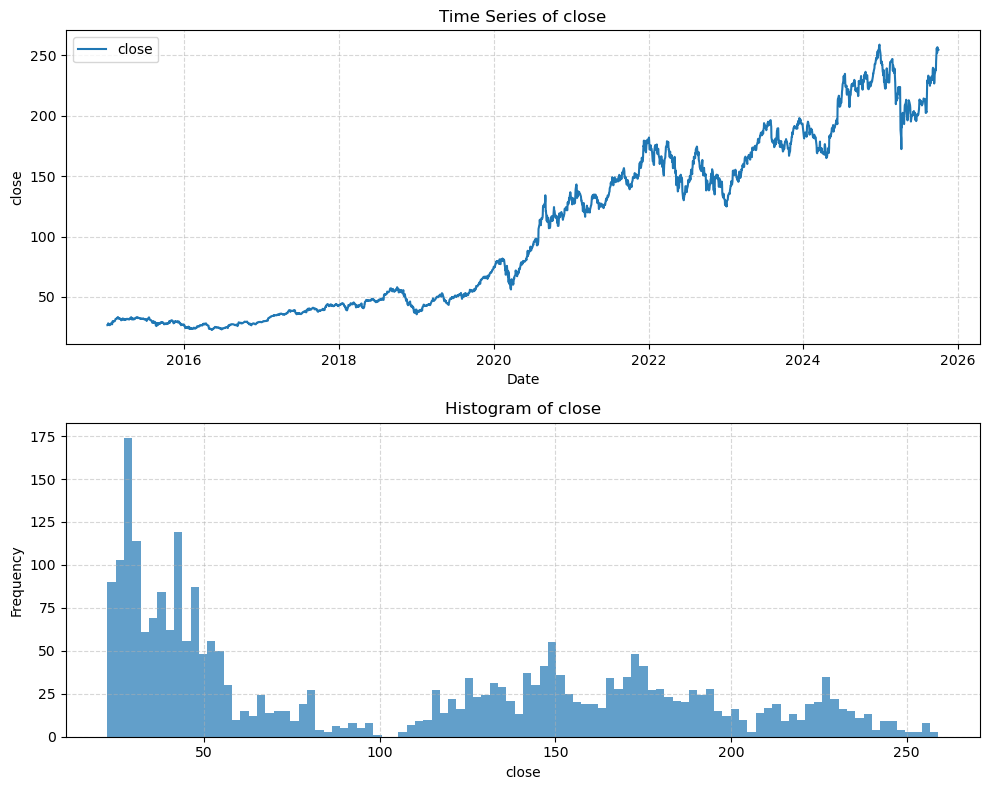

In [102]:
fig, axes = plt.subplots(2, 1 , figsize=(10, 8), sharex=False)

pr.plot_time_series(df, "close", ax=axes[0])
pr.histogram_distribution(df, "close", bins=100, ax=axes[1])

plt.tight_layout()
plt.show()

In [103]:
class KalmanFilter:
    def __init__(self, R=0.1, Q=0.01):
        self.R = R # Measument noise
        self.Q = Q # Process noise
        self.X = None # State estimae
        self.P = None # Error covariance

    def initialize(self, initial_value):
        self.x = initial_value
        self.P = 1.0
    
    def predict(self, signal_innovation=0):
        # State prediction
        self.x = self.x + signal_innovation
        # Covarriance prediction
        self.P = self.P + self.Q
        return self.x
    
    def update(self, measurment):
        if not np.isnan(measurment):
            # Kalman gain
            K = self.P / (self.P + self.R)
            # State update
            self.x = self.x + K*(measurment - self.x)
            # Corvariance update
            self.P = (1 - K) * self.P
        return self.x


In [ ]:

window_size = 252
R_roll = df["close"].diff().rolling(window_size).var().shift(1).fillna(method='bfill')
trend_proxy = df["close"].rolling(50).mean()
Q_roll = trend_proxy.diff().rolling(window_size).var().shift(1).fillna(method='bfill')


In [ ]:
KF = KalmanFilter()
KF.initialize(df["close"].iloc[0])

kf_trend = []
start_index = 252  

for t in range(start_index, len(df)):
    # Update Q and R dynamic
    KF.Q = Q_roll.iloc[t]
    KF.R = R_roll.iloc[t]
    
    # Predict & Update
    pred = KF.predict()
    upd = KF.update(df["close"].iloc[t])
    kf_trend.append(upd)


df_kf = df.iloc[start_index:].copy()
df_kf['kf_trend'] = kf_trend

print("Đã chạy xong Kalman Filter. Dữ liệu đã khớp.")

Đã chạy xong Kalman Filter. Dữ liệu đã khớp.


In [108]:
df_kf

,date,ticker,adj_close,close,high,low,open,volume,close_log_return,kf_trend
252,2016-01-05,AAPL,23.157917,25.677500,26.462500,25.602501,26.437500,223164000.0,-0.025379,25.849006
253,2016-01-06,AAPL,22.704720,25.174999,25.592501,24.967501,25.139999,273829600.0,-0.019764,25.545462
254,2016-01-07,AAPL,21.746479,24.112499,25.032499,24.107500,24.670000,324377600.0,-0.043121,25.092890
255,2016-01-08,AAPL,21.861469,24.240000,24.777500,24.190001,24.637501,283192000.0,0.005274,24.884281
256,2016-01-11,AAPL,22.215454,24.632500,24.764999,24.334999,24.742500,198957600.0,0.016063,24.831998
...,...,...,...,...,...,...,...,...,...,...
2696,2025-09-24,AAPL,252.065643,252.309998,255.740005,251.039993,255.220001,42303700.0,-0.008367,238.996928
2697,2025-09-25,AAPL,256.621216,256.869995,257.170013,251.710007,253.210007,55202100.0,0.017912,240.657552
2698,2025-09-26,AAPL,255.212601,255.460007,257.600006,253.779999,254.100006,46076300.0,-0.005504,242.037942
2699,2025-09-29,AAPL,254.183594,254.429993,255.000000,253.009995,254.559998,40127700.0,-0.004040,243.201699


In [ ]:
# 1. Calculate Spread (diffence between market price and filter price)
df_kf['spread'] = df_kf['close'] - df_kf['kf_trend']

# 2. Calculate Rolling Z-Score 
z_window = 63
spread_mean = df_kf['spread'].rolling(window=z_window).mean()
spread_std = df_kf['spread'].rolling(window=z_window).std()

df_kf['z_score'] = (df_kf['spread'] - spread_mean) / spread_std
df_kf.dropna(inplace=True)

# 3. Logic Giao dịch (Mean Reversion)
# - Long (Z-score < -2)
# - Short (Z-score > 2)
# - Exit (Z-score < 0.5)
entry_threshold = 2.0
exit_threshold = 0.5

positions = np.zeros(len(df_kf))
z_scores = df_kf['z_score'].values
current_pos = 0

for i in range(len(z_scores)):
    z = z_scores[i]
    
    if z < -entry_threshold:
        current_pos = -1    # Long
    elif z > entry_threshold:
        current_pos = 1     # Short
    elif abs(z) < exit_threshold:
        current_pos = 0      # Exit
        
    positions[i] = current_pos

df_kf['position'] = positions

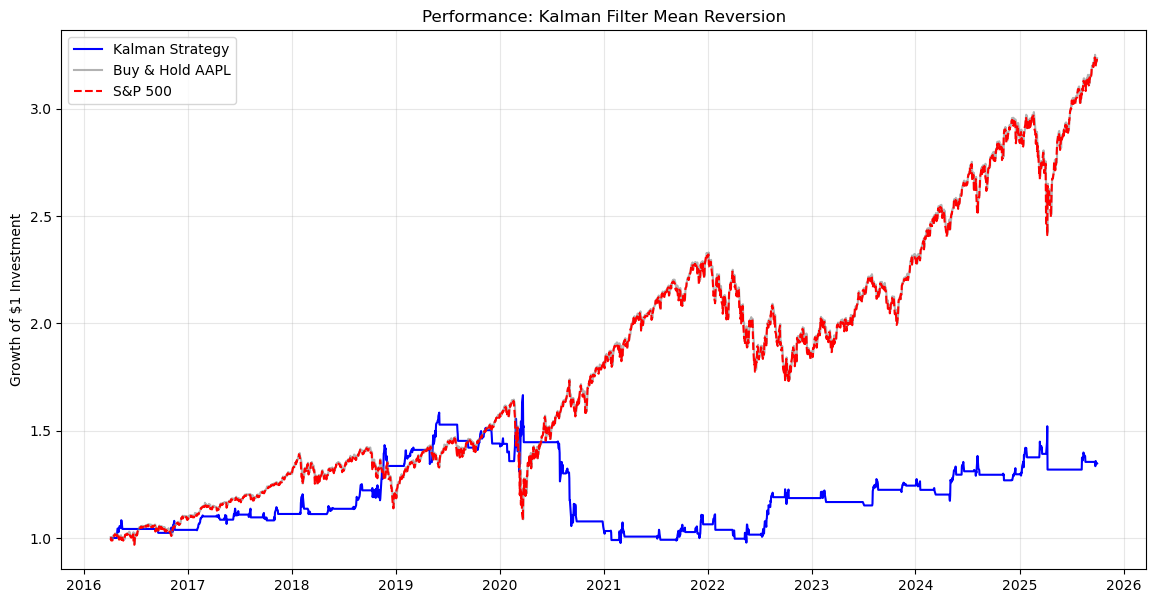

In [ ]:

df_kf['strategy_log_ret'] = df_kf['position'].shift(1) * df_kf['close_log_return']

df_kf['Strategy_Equity'] = np.exp(df_kf['strategy_log_ret'].cumsum())
df_kf['Benchmark_Equity'] = np.exp(df_SP500['close_log_return'].cumsum()) # Buy & Hold AAPL

plt.figure(figsize=(14, 7))
plt.plot(df_kf['date'], df_kf['Strategy_Equity'], label='Kalman Strategy', color='blue')
plt.plot(df_kf['date'], df_kf['Benchmark_Equity'], label='Buy & Hold AAPL', color='gray', alpha=0.6)

df_sp500_aligned = df_SP500[df_SP500['date'].isin(df_kf['date'])].copy()
if not df_sp500_aligned.empty:
    df_sp500_aligned['sp500_cum'] = np.exp(df_sp500_aligned['close_log_return'].cumsum())
    plt.plot(df_sp500_aligned['date'], df_sp500_aligned['sp500_cum'], label='S&P 500', color='red', linestyle='--')

plt.title('Performance: Kalman Filter Mean Reversion')
plt.ylabel('Growth of $1 Investment')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [111]:
import math

def calculate_metrics(returns):
    if len(returns) < 2: return {}
    # Annualized Return & Volatility
    mean_ret = returns.mean() * 252
    vol = returns.std() * math.sqrt(252)
    
    # Sharpe Ratio (assuming 0 risk-free rate for simplicity)
    sharpe = mean_ret / vol if vol != 0 else 0
    
    # Max Drawdown
    cum_ret = np.exp(returns.cumsum())
    peak = cum_ret.cummax()
    drawdown = (cum_ret - peak) / peak
    max_dd = drawdown.min()
    
    return {
        "Annual Return": f"{mean_ret*100:.2f}%",
        "Annual Vol": f"{vol*100:.2f}%",
        "Sharpe Ratio": f"{sharpe:.2f}",
        "Max Drawdown": f"{max_dd*100:.2f}%"
    }

print("--- Strategy Metrics ---")
print(calculate_metrics(df_kf['strategy_log_ret']))

print("\n--- Benchmark (AAPL) Metrics ---")
print(calculate_metrics(df_kf['close_log_return']))

--- Strategy Metrics ---
{'Annual Return': '3.15%', 'Annual Vol': '17.90%', 'Sharpe Ratio': '0.18', 'Max Drawdown': '-41.39%'}

--- Benchmark (AAPL) Metrics ---
{'Annual Return': '23.39%', 'Annual Vol': '29.26%', 'Sharpe Ratio': '0.80', 'Max Drawdown': '-38.73%'}
